<a href="https://colab.research.google.com/github/PashaIanko/Kaggle.ParisHousingPrices/blob/stacking_submit/4_model_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
from google.colab import drive
# Datasets
import pandas as pd
# Numerics
import numpy as np
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing & pipelines
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Data management
from sklearn.model_selection import train_test_split
# Other
import os

pd.set_option('display.max_columns', None)

In [2]:
%%capture
GIT_DOWNLOAD_PATH = 'https://raw.githubusercontent.com/PashaIanko/Sklearn-Utils/main/'
FILES_LIST = [
    'path_manager.py',
    'sklearn_transformers.py',
    'sklearn_utils.py',
    'model.py'
]
GDRIVE_PATH = '/content/gdrive/MyDrive/'
PREPROC_TRIAL = 2
MODELS_TRIAL = 1
COMPETITION_PATH = GDRIVE_PATH + 'ML/Competitions/10.ParisHousePrices/'
# --------------------------------------------------
try:
    from nbpep8.nbpep8 import pep8
except ModuleNotFoundError:
    !pip install pycodestyle
    !pip install --index-url https://test.pypi.org/simple/ nbpep8
from nbpep8.nbpep8 import pep8
# ---------------------------------------
def download_files(url_dict):
    for file, url in url_dict.items():
        print(f'Downloading {file}')
        !wget -O {file} {url} {file}
url_dict = {file: GIT_DOWNLOAD_PATH + file for file in FILES_LIST}
print('a')
download_files(url_dict)
# ---------------------------------------
import importlib
import path_manager
import sklearn_utils
import sklearn_transformers
import model
def reload_all(modules_list_):
    for module in modules_list_:
        importlib.reload(module)
MODULES_LIST = [
    path_manager,
    sklearn_utils,
    sklearn_transformers,
    model
]
reload_all(MODULES_LIST)
# ---------------------------------------
from path_manager import PathManager
from model import Model
from sklearn_utils import nan_statistics
from sklearn_utils import boxplot_regression
from sklearn_utils import get_correlated_attributes
from sklearn_utils import visualize_datasets_distributions
from sklearn_transformers import ColumnDropper
from sklearn_transformers import LogTransformer
# ---------------------------------------
from google.colab import drive
drive.mount('/content/gdrive')
manager = PathManager(
    competition_path=COMPETITION_PATH,
    preprocessing_trial=PREPROC_TRIAL,
    models_trial=MODELS_TRIAL
)
manager.setup_paths()

# Functions

In [3]:
from sklearn.metrics import mean_squared_error

def report_model(model, X, Y):
    preds = model.predict(X)
    print(
        mean_squared_error(
            y_pred=preds,
            y_true=Y,
            squared=False
        )
    )

# Download the data

In [4]:
os.listdir(manager.data_trial_path)

['train_processed.csv',
 'val_processed.csv',
 'test_processed.csv',
 'submission_processed.csv',
 'submission_elastic_20_10_23.csv',
 'rfr_20_10_23.csv']

In [5]:
df_train = pd.read_csv(f'{manager.data_trial_path}/train_processed.csv', index_col=0)
df_val = pd.read_csv(f'{manager.data_trial_path}/val_processed.csv', index_col=0)
df_test = pd.read_csv(f'{manager.data_trial_path}/test_processed.csv', index_col=0)
df_submission = pd.read_csv(f'{manager.data_trial_path}/submission_processed.csv', index_col=0)

In [6]:
X_train, Y_train = df_train.iloc[:, :-1], df_train.iloc[:, -1]
X_val, Y_val = df_val.iloc[:, :-1], df_val.iloc[:, -1]
X_test, Y_test = df_test.iloc[:, :-1], df_test.iloc[:, -1]
X_submission = df_submission.iloc[:, :]

Xs = [
    X_train,
    X_val,
    X_test,
    X_submission
]

Ys = [
    Y_train,
    Y_val,
    Y_test,
    None
]

# Download the models

In [7]:
models = manager.load_models(
    ['RF', 'ElasticNet']
)

In [8]:
models

{'RF': RandomForestRegressor(n_estimators=200),
 'ElasticNet': ElasticNet(alpha=0.5, l1_ratio=1.0, random_state=255, warm_start=True)}

# Visualize models' predictions

In [ ]:
report_model(models['RF'], X_train, Y_train)
report_model(models['RF'], X_val, Y_val)

3648.6598115769893
9998.503683088782


In [ ]:
report_model(models['ElasticNet'], X_train, Y_train)
report_model(models['ElasticNet'], X_val, Y_val)

9400.092574169268
10617.980993893025


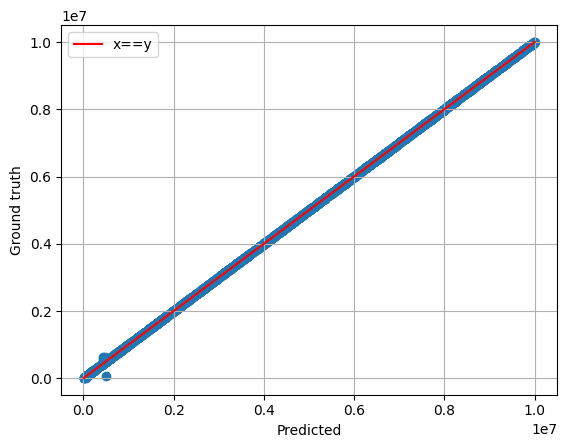

In [ ]:
from sklearn_utils import visualize_predictions

visualize_predictions(
    models['RF'],
    X_val,# [:5],
    Y_val# [:5],
)

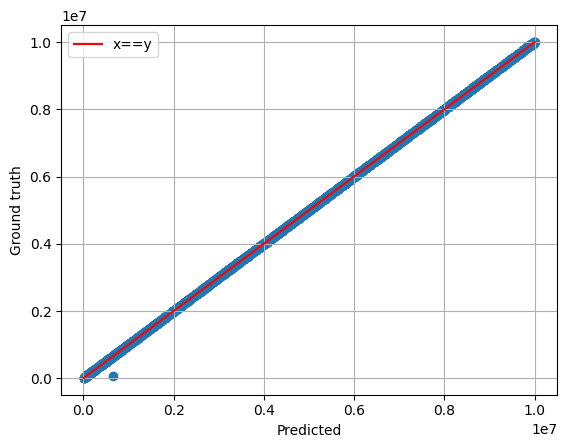

In [ ]:
visualize_predictions(
    models['ElasticNet'],
    X_val[:],
    Y_val[:],
)

In [9]:
def visualize_regression_predictions(
    sklearn_models_dict_,
    X_,
    Y_,
    dataset_type_
):
    _, ax = plt.subplots()
    ax.plot(
        Y_,
        label=f'{dataset_type_} target',
        linestyle='--'
    )

    for model_name, model in sklearn_models_dict_.items():
        predictions = model.predict(X_)
        ax.scatter(
            x=np.arange(len(predictions)),
            y=predictions,
            label=f'{model_name} predictions',
            alpha=0.5
        )

    ax.set_xlabel('Dataset instance')
    ax.set_ylabel('Prediction')
    ax.set_title(f'Visualized predictons on {dataset_type_}')

    ax.legend()
    ax.grid()

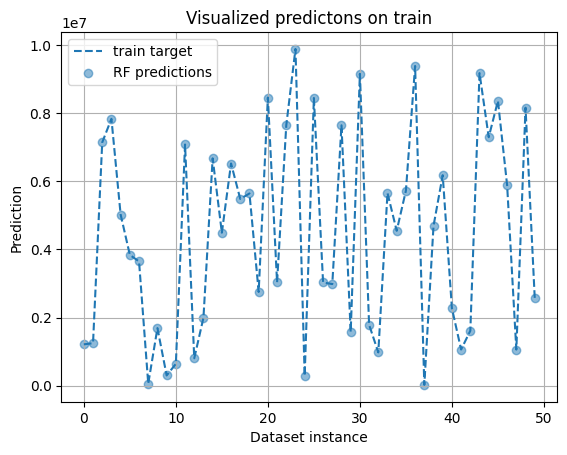

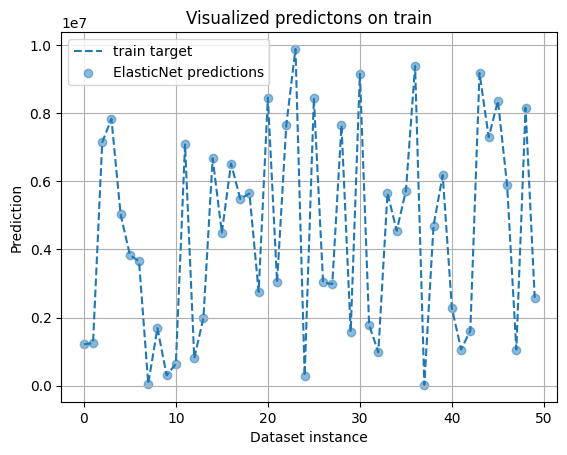

In [10]:
from sklearn_utils import dict_subset

N = 50

visualize_regression_predictions(
    dict_subset(models, ['RF']),
    X_val[:N],
    Y_val[:N],
    'train'
)

visualize_regression_predictions(
    dict_subset(models, ['ElasticNet']),
    X_val[:N],
    Y_val[:N],
    'train'
)

<Axes: >

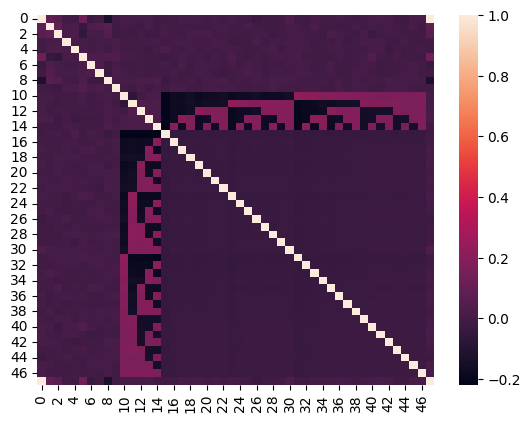

In [ ]:
sns.heatmap(df_train.corr())

In [ ]:
df_train.iloc[:, -1]

0        1709341.9
1        6289045.6
2         905128.5
3        9274536.6
4         667494.8
           ...    
13303    1584936.5
13304      10313.5
13305    7571050.6
13306    5304068.0
13307    4364937.3
Name: 47, Length: 13308, dtype: float64

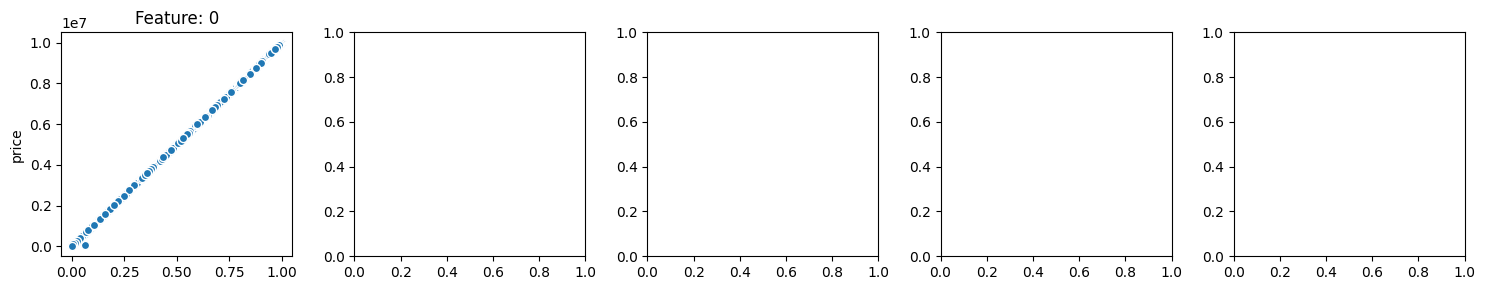

In [11]:
from sklearn_utils import visualize_target_vs_columns

visualize_target_vs_columns(
    df_train,
    '47',
    ['0']
)

# Visualize predictions VS square meter

(3327,) (3327,)
0 <module 'numpy' from '/usr/local/lib/python3.10/dist-packages/numpy/__init__.py'>
(3327,) (3327,)
0 <module 'numpy' from '/usr/local/lib/python3.10/dist-packages/numpy/__init__.py'>


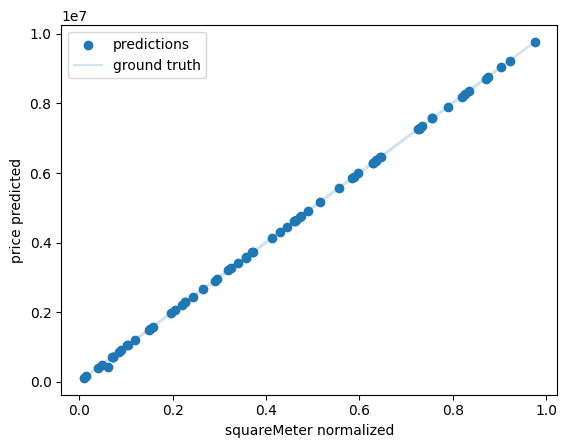

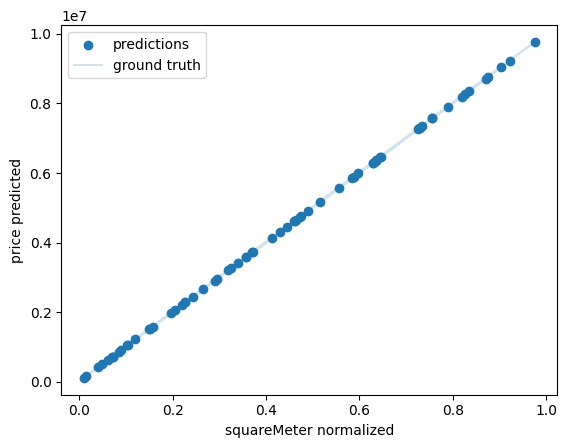

In [ ]:
def visualize_predictions_vs_square_meter(model, X, Y, markevery=50):
    preds = model.predict(X)
    x=X['0']

    _, ax = plt.subplots()
    ax.scatter(
        x=x[::markevery],
        y=preds[::markevery],
        label='predictions'
    )
    print(x.shape, Y.shape)
    ax.plot(
        x[::markevery],
        Y[::markevery],
        alpha=0.2,
        label='ground truth'
    )
    ax.set_xlabel('squareMeter normalized')
    ax.set_ylabel('price predicted')
    ax.legend()

    print(np.isnan(preds / x).sum(), np)

visualize_predictions_vs_square_meter(models['RF'], X_val, Y_val)
visualize_predictions_vs_square_meter(models['ElasticNet'], X_val, Y_val)

# Visualize predictions on submission dataset

(500,) (500,)
0 <module 'numpy' from '/usr/local/lib/python3.10/dist-packages/numpy/__init__.py'>
(500,) (500,)
0 <module 'numpy' from '/usr/local/lib/python3.10/dist-packages/numpy/__init__.py'>


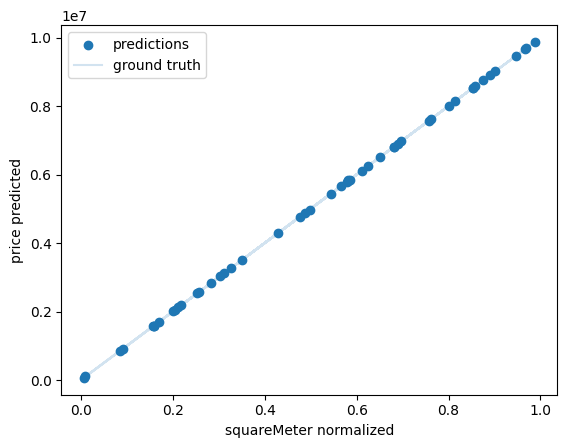

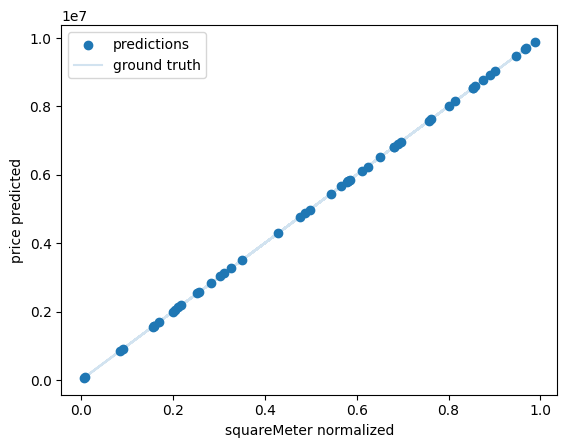

In [ ]:
FROM = 0
TO = 500
MARK=10

visualize_predictions_vs_square_meter(
    models['RF'],
    X_submission[FROM:TO],
    models['RF'].predict(X_submission[FROM:TO]),
    markevery=MARK
)

visualize_predictions_vs_square_meter(
    models['ElasticNet'],
    X_submission[FROM:TO],
    models['ElasticNet'].predict(X_submission[FROM:TO]),
    markevery=MARK
)

# Ensemble possibilities

In [12]:
from sklearn.metrics import mean_squared_error


print(mean_squared_error(Y_val, models['RF'].predict(X_val), squared=False))
print(mean_squared_error(Y_val, models['ElasticNet'].predict(X_val), squared=False))
print(
    mean_squared_error(
        Y_val,
        (models['ElasticNet'].predict(X_val) + models['RF'].predict(X_val)) / 2,
        squared=False
    )
)

9998.503683088782
10617.980993893025
9687.047421625237


In [13]:
models['RF']

RandomForestRegressor(n_estimators=200)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RandomForestRegressor(models['RF'])

RandomForestRegressor(n_estimators=RandomForestRegressor(n_estimators=200))

In [ ]:
models['ElasticNet']

ElasticNet(alpha=0.5, l1_ratio=1.0, random_state=255, warm_start=True)

In [14]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import ElasticNet, LinearRegression

stacking_est = StackingRegressor(
    [
        # ('rf', RandomForestRegressor(n_estimators=50)),
        # ('elastic_net', ElasticNet(alpha=0.5, l1_ratio=1.0, random_state=255, warm_start=True))
        ('rf', models['RF']),
        ('elastic_net', models['ElasticNet'])
    ],
    final_estimator=LinearRegression(),
    verbose=5
)

In [15]:
stacking_est.fit(
    X_train,
    Y_train
)

StackingRegressor(estimators=[('rf', RandomForestRegressor(n_estimators=200)),
                              ('elastic_net',
                               ElasticNet(alpha=0.5, l1_ratio=1.0,
                                          random_state=255, warm_start=True))],
                  final_estimator=LinearRegression(), verbose=5)

In [16]:
report_model(models['ElasticNet'], X_train, Y_train)
report_model(models['ElasticNet'], X_val, Y_val)

9400.092574169268
10617.980993893025


In [17]:
report_model(models['RF'], X_train, Y_train)
report_model(models['RF'], X_val, Y_val)

3648.6598115769893
9998.503683088782


In [18]:
report_model(stacking_est, X_train, Y_train)
report_model(stacking_est, X_val, Y_val)

7212.426405853513
9920.157045523343


# Save additional model

In [20]:
manager.save_models(
    {
        'StackRFRElastic': stacking_est
    }
)